
# 训练模型


对于线性模型，最小化MSE(均方误差)

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

## 梯度下降法（Gradient Descent）
### Batch Gradient Descent
it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large.

In [3]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
X_b = np.c_[np.ones((100, 1)), X]
for iteration in range(n_iterations):
    gradients = 2/float(m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
# grad = 2 / m * XT *(X*theta - y)

### Stochastic Gradient Descent
Over time it will end up very close to the minimum, but never settling down. So once the algorithm stops, the final parameter values are good, but not optimal.

In [4]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter = 50, penalty = None, eta0 = 0.1)
#default learning schedule
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_


/home/bladeray/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([4.20965338]), array([2.77765358]))

## Mini-batch Gradient Descent
computes the gradients on small random sets of instances called mini-batches. 

In [5]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [6]:
theta

array([[4.25214635],
       [2.7896408 ]])

## 多项式模型Polynomial regression

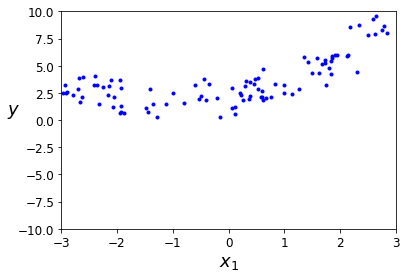

array([-2.78905805,  7.77884479])

In [25]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, -10, 10])
plt.show()
from sklearn.preprocessing import PolynomialFeatures
pol_fea = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = pol_fea.fit_transform(X)
X[0]
X_poly[0]


In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.06389798]), array([[1.02173283, 0.49789063]]))

## Learning Curve

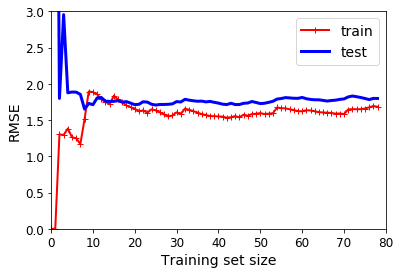

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predit = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predit))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
#save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()        

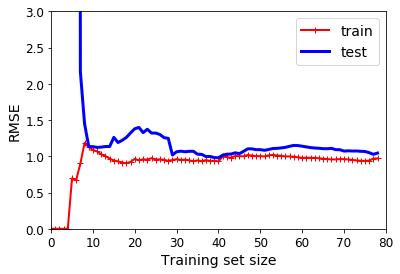

In [36]:
#use pipeline
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
#save_fig("learning_curves_plot")  # not shown
plt.show() 

## 正则化线性模型（Regularized Linear Models）
Lasso是一阶正则化，岭回归是二阶。lasso的出发点是减少overfit，而岭回归一般认为是处理多重共线性的一种做法，当然它也有降低overfit的作用。lasso实际上是挑选自变量的一种做法，岭回归是压缩某些系数。二者都会在训练集上放大误差，但是均能在测试集上减小估计误差（理论上）。
http://blog.csdn.net/zouxy09/article/details/24971995/
w = argmin(L(f(x, w), y) + lambda * Omiga(w))
对于第一项Loss函数，如果是Square loss，那就是最小二乘了；如果是Hinge Loss，那就是著名的SVM了；如果是exp-Loss，那就是牛逼的 Boosting了；如果是log-Loss，那就是Logistic Regression了


关于损失函数，可以通过参数loss设置。可选的损失函数包括：

·        loss="hinge": (soft-margin) linear Support Vector Machine,

·        loss="modified_huber": smoothed hinge loss,

·        loss="log": logistic regression,

·        loss="squared_loss": Ordinary least squares,

·        loss="huber": Huber loss for robust regression,

·        loss="epsilon_insensitive": linear Support Vector Regression.

关于惩罚项，可以通过penalty参数设置，可选的包括：

·        penalty="l2": L2 norm penalty on coef_.

·        penalty="l1": L1 norm penalty on coef_.

·        penalty="elasticnet": Convex combination of L2 and L1;(1 - l1_ratio) * L2 + l1_ratio * L1.

### Ridge Regression（L2正则化）
solver：{'auto'，'svd'，'cholesky'，'lsqr'，'sparse_cg'，'sag'}
用于计算的求解方法：
'auto'根据数据类型自动选择求解器。
'svd'使用X的奇异值分解来计算Ridge系数。对于奇异矩阵比'cholesky'更稳定。
'cholesky'使用标准的scipy.linalg.solve函数来获得闭合形式的解。
'sparse_cg'使用在scipy.sparse.linalg.cg中找到的共轭梯度求解器。作为迭代算法，这个求解器比大规模数据（设置tol和max_iter的可能性）的“cholesky”更合适。
'lsqr'使用专用的正则化最小二乘常数scipy.sparse.linalg.lsqr。它是最快的，但可能不是在旧的scipy版本可用。它还使用迭代过程。
'sag'使用随机平均梯度下降。它也使用迭代过程，并且当n_samples和n_feature都很大时，通常比其他求解器更快。注意，“sag”快速收敛仅在具有近似相同尺度的特征上被保证。您可以使用sklearn.preprocessing的缩放器预处理数据。

In [3]:
from sklearn.linear_model import Ridge
import numpy as np
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)
#最小二乘Ridge方法
ridge_reg = Ridge(alpha = 1, solver = "cholesky", random_state = 42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [4]:
#随机梯度下降正则化L2（线性）
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 5, penalty = "l2", random_state = 42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/home/bladeray/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1.13500145])

In [7]:

ridge_reg = Ridge(alpha = 1, solver = "lsqr", random_state = 42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

## Lasso Regression（L1正则化）
与L2正则化不同的是，正则项从二次方变为了一次放的绝对值，这就带来的一个特性，不同于L2正则化使得θ在原点附近（即大部分θ都靠近0），L1正则化使得θ更趋向于在坐标轴上（即大部分的θ等于零，少部分靠近零），相当于惩罚变得更大。

In [8]:
#最小二乘LASSO方法
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [14]:
#随机梯度下降正则化L1（线性）
sgd_reg_l1 = SGDRegressor(max_iter = 5, penalty = "l1", random_state = 42)
sgd_reg_l1.fit(X, y.ravel())
sgd_reg_l1.predict([[1.5]])

array([1.13498188])

## Elastic Net
Elastic Net是L1正则化和L2正则化的结合，通过一个参数调整比例。

In [15]:
#最小二乘ElasticNet方法
from sklearn.linear_model import ElasticNet
elatic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elatic_net.fit(X, y)
elatic_net.predict([[1.5]])

array([1.54333232])

In [24]:
#随机梯度下降ElasticNet（线性）
from sklearn.linear_model import SGDRegressor
sgd_reg_ela = SGDRegressor(max_iter =5, penalty="elasticnet", l1_ratio = 0.5)
sgd_reg_ela.fit(X, y)
sgd_reg_ela.predict([[1.5]])

/home/bladeray/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1.13204842])

## Logistic回归（Logistic Regression）

In [1]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, 3:] # 只读取最后一个特征
y = (iris["target"] == 2).astype(np.int) # 取出判断是否为第3类的label

In [4]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty = "l1", random_state = 42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

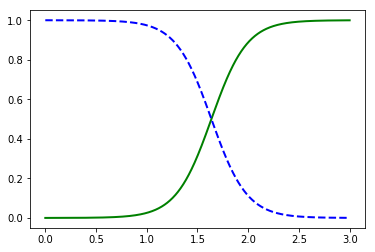

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

## Softmax Regression

Softmax回归使用交叉熵（cross entropy）函数作为损失函数
The cross entropy between two probability distributions p and q is defined as: H (p, q) = − ∑x p(x)*log q(x) 

solver：优化算法选择参数，只有五个可选参数，即newtoncg,lbfgs,liblinear,sag,saga。默认为liblinear。solver参数决定了我们对逻辑回归损失函数的优化方法，有四种算法可以选择，分别是： 
liblinear：使用了开源的liblinear库实现，内部使用了坐标轴下降法来迭代优化损失函数。
lbfgs：拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
newton-cg：也是牛顿法家族的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
sag：即随机平均梯度下降，是梯度下降法的变种，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候。
saga：线性收敛的随机优化算法的的变重。

In [7]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]
# 正则化系数λ的倒数
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)